In [ ]:
# GET POSITION BY CLICKING ON THE MAP
# then save it in the variable event_points.npy, aleady in R coord

import numpy as np
import cv2 as cv
import os
from helper_functions import *

wind_name = 'Get position'
event_points = []

def mouse_callback(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        # cv.circle(img, (x,y), 50, (0,200,0), 10)
        p_pix = np.array([x,y])
        p = pix2mR(p_pix)
        print(p)
        event_points.append(p)
        cv.circle(img, mR2pix(p), 50, (200,0,200), 10)
        cv.circle(img, mR2pix(p), 3, (200,0,200), -1)
        cv.putText(img, str(p), mR2pix(p), cv.FONT_HERSHEY_SIMPLEX, 1, (200,100,200), 2)

img = cv.imread('data/2021_VerySmall.png')
cv.namedWindow(wind_name, cv.WINDOW_NORMAL)
cv.imshow(wind_name, img)

cv.setMouseCallback(wind_name, mouse_callback)

while True:
    cv.imshow(wind_name, img)
    key = cv.waitKey(1) 
    if key == 27: #ESC
        print('Exiting...')
        break


cv.destroyAllWindows()

In [3]:
## generate the stop line points by clicking on the map
import numpy as np
import cv2 as cv
import os
from helper_functions import *
#already generated in data/stop_points.npy

stop_line_points = np.load('data/stop_line_points.npy')

# stop_line_points = stop_line_points[0:-2,:]
# np.save('data/stop_points2.npy', stop_line_points)

#visualoize stop line points
cv.namedWindow('stop_line_points', cv.WINDOW_NORMAL)
cv.resizeWindow('stop_line_points', 600, 600)
img = cv.imread('data/2021_VerySmall.png')
for i in range(stop_line_points.shape[0]):
    p = stop_line_points[i,:]
    # cv.circle(img, mL2pix(p), 5, (0,0,255), -1)
    cv.circle(img, mR2pix(p), 5, (0,255,255), -1)
cv.imshow('stop_line_points', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
# GENERATE EVENT POINTS BY CLICKING ON THE MAP
# then save it in the variable event_points.npy, aleady in R coord

import numpy as np
import cv2 as cv
import os
from helper_functions import *

wind_name = 'Create Events'
event_points = []

def mouse_callback(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        # cv.circle(img, (x,y), 50, (0,200,0), 10)
        p_pix = np.array([x,y])
        p = pix2mR(p_pix)
        print(p)
        event_points.append(p)
        cv.circle(img, mR2pix(p), 50, (200,0,200), 10)
        cv.circle(img, mR2pix(p), 3, (200,0,200), -1)

img = cv.imread('data/2021_VerySmall.png')
cv.namedWindow(wind_name, cv.WINDOW_NORMAL)
cv.imshow(wind_name, img)

cv.setMouseCallback(wind_name, mouse_callback)

while True:
    cv.imshow(wind_name, img)
    key = cv.waitKey(1) 
    if key == 27: #ESC
        print('Canceling...')
        break
    if key == 13: #ENTER
        print('Saving...')
        to_save = np.array(event_points)
        np.save('data/event_points.npy', to_save)
        break

cv.destroyAllWindows()

# to_save = np.array([[0.83874612, 0.77944084],
# [2.2408924,  1.27082745],
# [4.41824343, 1.27082745],
# [3.5371364,  1.63936741],
# [2.67297374, 2.12228184],
# [5.74414007, 1.63513132],
# [5.73990398, 2.02061565],
# [1.27506354, 1.65207568],
# [0.46173397, 2.12228184],
# [0.83027393, 2.58401581],
# [0.46173397, 3.02456933],
# [0.83874612, 3.67269133],
# [2.19853149, 4.15984185],
# [3.05845806, 3.67269133],
# [4.42247953, 4.15984185],
# [5.26969783, 3.71081615],
# [3.54137249, 4.54109009],
# [4.89692177, 5.01129624],
# [1.31742446, 4.5326179 ],
# [0.45749788, 5.01129624],
# [4.89268568, 2.12228184],
# [5.27393392, 7.53177069],
# [4.42247953, 8.01044903],
# [3.06269415, 7.53177069],
# [2.67297374, 7.53177069],
# [2.19853149, 8.01044903],
# [3.5371364,  8.39169726],
# [1.31742446, 8.40016944],
# [0.84298221, 7.53177069],
# [4.87574132, 8.83225078],
# [0.46597006, 8.8703756 ],
# [ 6.76080203, 11.08585145],
# [ 7.20135555, 11.44591923],
# [10.06071731, 10.24286925],
# [10.89522734, 11.45015532],
# [11.88647275, 10.61140921],
# [ 8.85343123, 11.08161536],
# [ 6.6760802,  13.28861903],
# [ 6.23552669, 12.92007907],
# [ 4.32928551, 13.28861903],
# [ 2.9906806,  12.92855126],
# [7.79440836, 0.8980514 ]])
# np.save('data/event_points.npy', to_save)

points = np.load('data/event_points.npy')
img = cv.imread('data/2021_VerySmall.png')
for i in range(points.shape[0]):
    p = points[i]
    cv.circle(img, mR2pix(p), 30, (0,200,0), 10)
    cv.circle(img, mR2pix(p), 5, (0,220,0), -1)

cv.namedWindow('events', cv.WINDOW_NORMAL)
cv.imshow('events', img)
cv.waitKey(0)
cv.destroyAllWindows()

Saving...


In [ ]:
# STOP LINES (CURR NOT USED, go down for events)

#classify every stop_line with its required characteristics
#the cell shows the stop_points one by one and it's possible to use the keyboard to classify them

import numpy as np
import cv2 as cv
import os
from helper_functions import *
from IPython.display import clear_output # to clear the output of the notebook
event_points = np.load('data/stop_points2.npy')
map_img = cv.imread('data/2021_VerySmall.png')

stop_line_type = np.zeros(len(stop_line_points))

d = {
    'intersection_stop':            ('s',0),
    'intersection_traffic_light':   ('t',1),
    'intersection_priority' :       ('p',2),
    'junction':                     ('j',3),
    'roundabout':                   ('r',4),
    'crosswalk':                    ('c',5),
}

cv.namedWindow('Classify the point', cv.WINDOW_NORMAL)
# cv.resizeWindow('Classify the point',800,800)
last_selection = 'None'
print('Press the key to select the type of the point')
for k,v in d.items():
    print(f'{k} ==> {v[0]}')
print('Press [ESC] to quit\n')
for i in range(len(stop_line_points)):
    tmp_map = map_img#.copy()
    cv.circle(tmp_map, (mR2pix(stop_line_points[i][0]), mR2pix(stop_line_points[i][1])), 50, (0,0,255), 10)
    cv.imshow('Classify the point', tmp_map)
    key = cv.waitKey(0)
    if key == 27: # esc
        break
    else :
        done = False
        while not done:
            for k,v in d.items():
                if key == ord(v[0]):
                    stop_line_type[i] = v[1]
                    last_selection = k
                    cv.circle(tmp_map, (mR2pix(stop_line_points[i][0]), mR2pix(stop_line_points[i][1])), 50, (0,255,0), 10)
                    done = True
                    break
            if not done:
                key = cv.waitKey(0)
    print(f'{last_selection}')
cv.destroyAllWindows()

print(stop_line_type)

np.save('data/stop_line_types.npy', stop_line_type)


In [7]:
# EVENTS 

#classify every EVENT (stop_line and parking) with its required characteristics 
#the cell shows the stop_points one by one and it's possible to use the keyboard to classify them

import numpy as np
import cv2 as cv
import os
from helper_functions import *
from IPython.display import clear_output # to clear the output of the notebook
event_points = np.load('data/event_points.npy')
map_img = cv.imread('data/2021_VerySmall.png')
event_type = np.zeros(len(event_points))

d = {
    'intersection_stop':            ('s',0),
    'intersection_traffic_light':   ('t',1),
    'intersection_priority' :       ('i',2),
    'junction':                     ('j',3),
    'roundabout':                   ('r',4),
    'crosswalk':                    ('c',5),
    'parking':                      ('p',6),
    'highway_exit':                 ('e',7),
}

cv.namedWindow('Classify the point', cv.WINDOW_NORMAL)
# cv.resizeWindow('Classify the point',800,800)
last_selection = 'None'
print('Press the key to select the type of the point')
for k,v in d.items():
    print(f'{k} ==> {v[0]}')
print('Press [ESC] to quit\n')
for i in range(len(event_points)):
    tmp_map = map_img#.copy()
    p = event_points[i]
    print(f'p = {p}')
    print(f'mR2pix(p) = {mR2pix(p)}')
    cv.circle(tmp_map, mR2pix(p), 50, (0,0,255), 10)
    cv.imshow('Classify the point', tmp_map)
    key = cv.waitKey(0)
    if key == 27: # esc
        break
    else :
        done = False
        while not done:
            for k,v in d.items():
                if key == ord(v[0]):
                    event_type[i] = v[1]
                    last_selection = k
                    cv.circle(tmp_map, mR2pix(event_points[i]), 50, (0,255,0), 10)
                    done = True
                    break
            if not done:
                key = cv.waitKey(0)
    print(f'{last_selection}')
cv.destroyAllWindows()

print(event_type)

np.save('data/event_types.npy', event_type)


Press the key to select the type of the point
intersection_stop ==> s
intersection_traffic_light ==> t
intersection_priority ==> i
junction ==> j
roundabout ==> r
crosswalk ==> c
parking ==> p
highway_exit ==> e
Press [ESC] to quit

p = [0.83874612 0.77944084]
mR2pix(p) = (198, 3356)
intersection_traffic_light
p = [2.2408924  1.27082745]
mR2pix(p) = (528, 3240)
intersection_stop
p = [4.41824343 1.27082745]
mR2pix(p) = (1042, 3240)
intersection_stop
p = [3.5371364  1.63936741]
mR2pix(p) = (834, 3154)
intersection_priority
p = [2.67297374 2.12228184]
mR2pix(p) = (631, 3040)
intersection_stop
p = [5.74414007 1.63513132]
mR2pix(p) = (1355, 3154)
intersection_stop
p = [5.73990398 2.02061565]
mR2pix(p) = (1354, 3063)
intersection_stop
p = [1.27506354 1.65207568]
mR2pix(p) = (300, 3151)
intersection_stop
p = [0.46173397 2.12228184]
mR2pix(p) = (108, 3040)
intersection_stop
p = [0.83027393 2.58401581]
mR2pix(p) = (195, 2931)
crosswalk
p = [0.46173397 3.02456933]
mR2pix(p) = (108, 2827)
crosswa

In [8]:
# GENERATE SIGNS POINTS BY CLICKING ON THE MAP
# then save it in the variable sign_points.npy, aleady in R coord

import numpy as np
import cv2 as cv
import os
from helper_functions import *

wind_name = 'Create Sign Points'
event_points = []

def mouse_callback(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        # cv.circle(img, (x,y), 50, (0,200,0), 10)
        p_pix = np.array([x,y])
        p = pix2mR(p_pix)
        print(p)
        event_points.append(p)
        cv.circle(img, mR2pix(p), 50, (200,0,200), 10)
        cv.circle(img, mR2pix(p), 3, (200,0,200), -1)

img = cv.imread('data/2021_VerySmall.png')
cv.namedWindow(wind_name, cv.WINDOW_NORMAL)
cv.imshow(wind_name, img)

cv.setMouseCallback(wind_name, mouse_callback)

while True:
    cv.imshow(wind_name, img)
    key = cv.waitKey(1) 
    if key == 27: #ESC
        print('Canceling...')
        break
    if key == 13: #ENTER
        print('Saving...')
        to_save = np.array(event_points)
        np.save('data/sign_points.npy', to_save)
        break

cv.destroyAllWindows()


points = np.load('data/sign_points.npy')
img = cv.imread('data/2021_VerySmall.png')
for i in range(points.shape[0]):
    p = points[i]
    cv.circle(img, mR2pix(p), 30, (0,200,0), 10)
    cv.circle(img, mR2pix(p), 5, (0,220,0), -1)

cv.namedWindow('signs', cv.WINDOW_NORMAL)
cv.imshow('signs', img)
cv.waitKey(0)
cv.destroyAllWindows()

[2.22818413 0.96159277]
[4.39706298 0.93194013]
[6.21011014 0.76249647]
[9.57356679 0.52951144]
[10.59870093  0.65235809]
[12.30160971 10.56904829]
[10.90793561 11.76362609]
[10.38266027 10.20050833]
[10.70460322  9.31516521]
[9.06523581 9.23891556]
[ 8.87884778 10.72578368]
[ 6.75232985 10.72578368]
[ 7.20559164 11.76362609]
[ 6.25670714 12.56848348]
[ 6.66337193 13.59361762]
[ 4.46060435 13.57667326]
[ 4.04123129 12.63202485]
[ 2.78734821 13.57667326]
[ 2.89748659 12.58542785]
[0.16944366 8.86613951]
[4.3843547  7.65885343]
[1.20728608 7.48517368]
[0.16944366 4.97740751]
[0.16944366 2.99491669]
[1.0971477  2.51200226]
[3.56255295 1.98672691]
[5.60858515 3.65998306]
[3.34651228 5.19344818]
[2.43151652 5.19344818]
[6.16351313 2.29596159]
Saving...


In [9]:
# SIGNS 

#classify every SIGN with its required characteristics 

import numpy as np
import cv2 as cv
import os
from helper_functions import *
from IPython.display import clear_output # to clear the output of the notebook
sign_points = np.load('data/sign_points.npy')
map_img = cv.imread('data/2021_VerySmall.png')
sign_types = np.zeros(len(sign_points))

d = {
    'park':                         ('p',0),
    'closedroad':                   ('d',1),
    'hw_exit':                      ('x',2),
    'hw_enter':                     ('n',3),
    'stop':                         ('s',4),
    'roundabout':                   ('r',5),
    'priority' :                    ('i',6),
    'crosswalk':                    ('c',7),
    'oneway':                       ('o',8),
}

cv.namedWindow('Classify the point', cv.WINDOW_NORMAL)
# cv.resizeWindow('Classify the point',800,800)
last_selection = 'None'
print('Press the key to select the type of the SIGN')
for k,v in d.items():
    print(f'{k} ==> {v[0]}')
print('Press [ESC] to quit\n')
for i in range(len(sign_points)):
    tmp_map = map_img#.copy()
    p = sign_points[i]
    cv.circle(tmp_map, mR2pix(p), 50, (0,0,255), 10)
    cv.imshow('Classify the point', tmp_map)
    key = cv.waitKey(0)
    if key == 27: # esc
        break
    else :
        done = False
        while not done:
            for k,v in d.items():
                if key == ord(v[0]):
                    sign_types[i] = v[1]
                    last_selection = k
                    cv.circle(tmp_map, mR2pix(sign_points[i]), 50, (0,255,0), 10)
                    done = True
                    break
            if not done:
                key = cv.waitKey(0)
    print(f'{last_selection}')
cv.destroyAllWindows()

print(sign_types)

np.save('data/sign_types.npy', sign_types)

Press the key to select the type of the SIGN
park ==> p
closedroad ==> d
hw_exit ==> x
hw_enter ==> n
stop ==> s
roundabout ==> r
priority ==> i
crosswalk ==> c
oneway ==> o
Press [ESC] to quit

stop
stop
hw_enter
hw_exit
oneway
stop
roundabout
roundabout
hw_exit
hw_enter
roundabout
crosswalk
crosswalk
crosswalk
crosswalk
park
park
park
park
priority
stop
stop
stop
crosswalk
crosswalk
priority
priority
oneway
oneway
hw_exit
[4. 4. 3. 2. 8. 4. 5. 5. 2. 3. 5. 7. 7. 7. 7. 0. 0. 0. 0. 6. 4. 4. 4. 7.
 7. 6. 6. 8. 8. 2.]


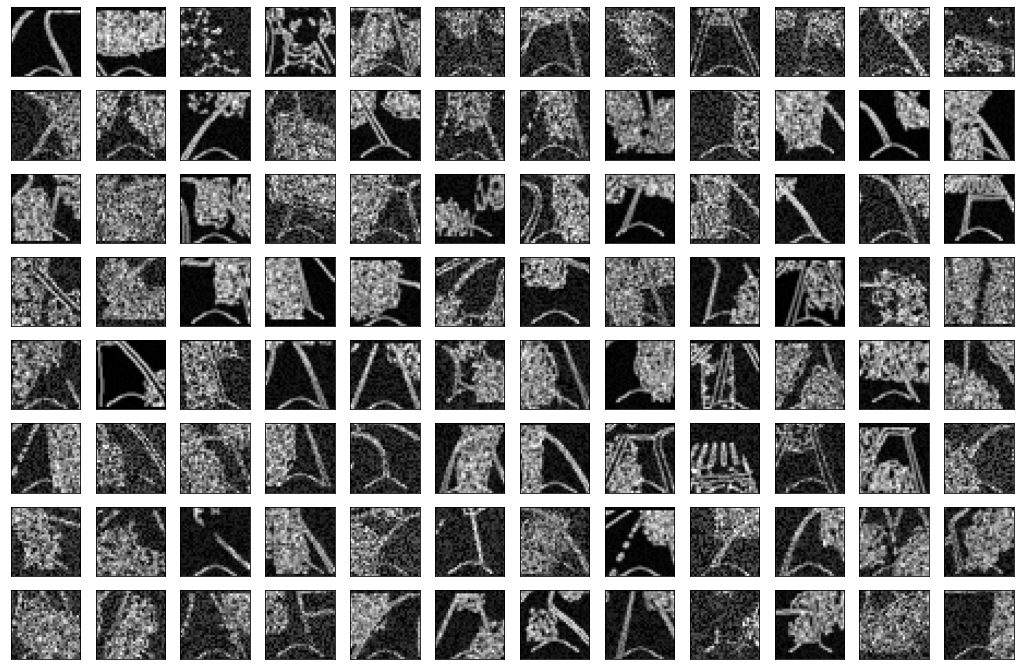

In [16]:
# Generate image collage for presentation
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv 

def plot_nchw_data(data, h_num, v_num, title, size=(10, 10)):
    fig, axs = plt.subplots(h_num, v_num, figsize=size)
    # shape = data.shape
    # data = data.reshape(shape[0]*shape[1], shape[2], shape[3])
    for idx, ax in enumerate(axs.flatten()):
        ax.set_xticks([])
        ax.set_yticks([])
        if idx < len(data):
            ax.imshow(data[idx,:,:], cmap='gray')
    if title is not None:
        plt.suptitle(title)
    #plt.tight_layout(rect=[0, 0, 1, 0.97], h_pad=0, w_pad=0)
    plt.show()
    return fig

folder = os.path.join('random_stuff', 'imgs_presentation')

#get all the images inside the folder
imgs = []
for file in os.listdir(folder):
    if file.endswith('.png') and file.startswith('img'):
        img = cv.imread(os.path.join(folder, file))
        #convert to grayscale
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        cv.imshow('img', img)
        if cv.waitKey(1) == 27:
            break
        imgs.append(img)
cv.destroyAllWindows()

data = np.zeros((len(imgs),512,512), dtype=np.uint8)
for i in range(len(imgs)):
    data[i,:,:] = imgs[i]

figure = plot_nchw_data(data, 8, 12, None, size=(18,12))




